<hr><hr>
<h2 style="color:skyblue">
Knapsack Problem by Genetics Algorithm
</h2>
<p>
Suppose you have a backpack; And there are some items to pick as your snack each with<br>
some particular amount; Then you have to choose how much you want to pick of each item<br>
between the available ones to bring them with you in a picnic!<br>
But you have to choose them in a way that:<br><br>
    → picked_weight < max_weight<br>
    → picked_value > min_value<br>
    → picked_items_count <strong>in</strong> legal_count_interval<br>
</p>

<hr>
<h3 style="color:#00FF00">Goal</h3>
<p>
The primary objective of this project is to develop a genetic algorithm-based solution <br>
to the knapsack problem with additional constraints on the number of items selected.<br>
Specifically, the goal is to design an algorithm that efficiently selects a subset of items<br>
to pack into a backpack for a picnic, while satisfying the following criteria:<br><br>
→<x style="color:#FFE4B5"> Maximize Value</x><br>
→<x style="color:#FFE4B5"> Respect Weight Limit</x><br>
→<x style="color:#FFE4B5"> Maintain Item Count Constraints</x><br>
→<x style="color:#FFE4B5"> Optimize Selection Process</x><br>
</p>

In [27]:
from random import *
import pandas as pd
import matplotlib.pyplot as plt

            Snack  Available Weight  Value
0          MazMaz                10     10
1   Doogh-e-Abali                15     10
2            Nani                 5      5
3            Jooj                 7     15
4         Hot-Dog                20     15
5           Chips                 8      6
6        Nooshaba                12      8
7        Shokolat                 6      7
8       Chocoroll                 9     12
9         Cookies                11     11
10        Abnabat                 4      4
11   Adams-Khersi                14      9
12        Popcorn                16     13
13         Pastil                 3      7
14       Tordilla                10      9
15       Masghati                 5      6
16        Ghottab                 7     10
17   Saghe-Talaei                 9     11
18    Choob-Shoor                13     12


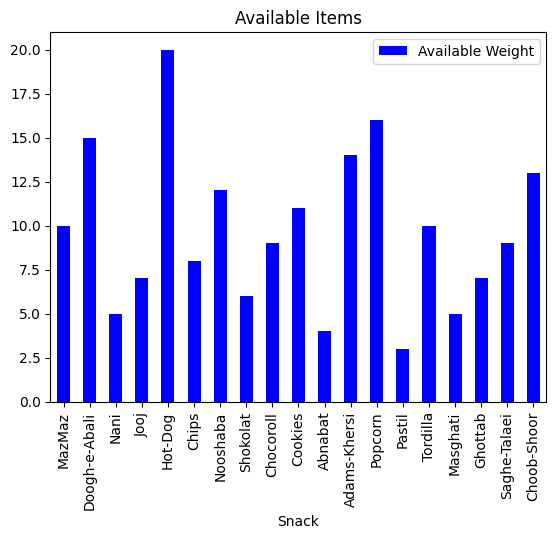

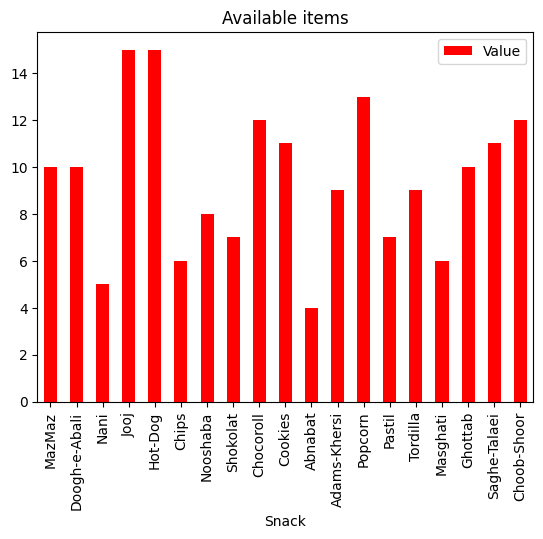

In [28]:
df = pd.read_csv("c.csv")
items_weight = df['Available Weight'].tolist() # filled with weights in order
items_values = df['Value'].tolist() # filled with values in order
print(df)

df.plot(kind='bar', x='Snack', y='Available Weight', color='blue')
plt.title("Available Items")
plt.xticks(rotation=90)
plt.show()
df.plot(kind='bar', x="Snack", y='Value', color='red')
plt.title("Available items")
plt.xticks(rotation=90)
plt.show()

TOTAL_GEN_COUNT = 100
WEIGHT_LIMIT = int(input('Enter weight limit: '))
MINIMUM_VALUE = int(input('Enter minimum value: '))
FIT_ITEM_COUNT = tuple(map(int, input('Enter the interval for count of items: ').split(" ")))
TOTAL_ITEMS_COUNT = df.shape[0] # count of avaiable items to pick
TOTAL_CHROMO_COUNT = 100

<h3 style="color:yellow">Chromosome</h3>
It represents a candidate solution to the knapsack problem, i.e., a particular<br>
combination of items. The length of the chromosome equals the number of items<br>
in the problem instance.</p>
<hr>
<h3 style="color:yellow">Fitness</h3>
Fitness function is designated in the chromosome class itself. It<br>
functions in a way to maximize the value of picked amount of items but not <br>
to exceed the weight limitation.</p>

<p><strong><x style="color:red">Some Issues</x></strong>→the most tricky and difficult part of this project was about <br>
designing the fitness function. The very first trials led to no good result<br>
(the fitness couldn't make the chromosomes approach a good one according<br>
to its weight and value)</p>

<p>some samples of these struggles:</p>



In [29]:
# Attempt 1
# def get_fitness(self) -> float:
#         fitness = 0
#         if (self.weight > WEIGHT_LIMIT):
#             fitness += 0
#         else:
#             fitness += self.value
#         return fitness

# Attempt 2
# def get_fitness(self) -> float:
#         fitness = 0
#         if (self.weight == WEIGHT_LIMIT)
#            fitness += 9999
#         elif (self.weight < WEIGHT_LIMIT):
#            fitness += 100/(self.weight - WEIGHT_LIMIT)
#         else:
#            fitness += 100/(self.weight - WEIGHT_LIMIT)

#         if (abs(self.weight - WEIGHT_LIMIT) > 1):
#            fitness += (self.value - MINIMUM_VALUE)/30
#         else:
#            fitness += self.value - MINIMUM_VALUE*2
#         return fitness

In [30]:
class Chromosome:
    
    def __init__(self, genes:list) -> None:
  
        self.genes = list(genes)
        self.weight = self.get_weight()
        self.value = self.get_value()
        self.picked_item_count = self.get_count()
        self.fitness = self.get_fitness()


    # returns the fitness of chromo with respect to it's values and weight
    def get_fitness(self) -> float:
        fitness = 0
        if (self.picked_item_count not in range(FIT_ITEM_COUNT[0], FIT_ITEM_COUNT[1] + 1)):
            fitness = 0
        else:
            try:
                if self.weight > WEIGHT_LIMIT:
                    raise ValueError
                fitness = self.value
            except:
                fitness = 0

        return fitness
    

    # finding the weight of items this chromosome has picked
    def get_weight(self) -> float:
        
        total_wght = 0
       
        for gene_id in range(len(self.genes)):
            total_wght += (self.genes[gene_id])*(items_weight[gene_id])
        
        return total_wght


    # finding the value of items this chromosome has picked
    def get_value(self) -> float:

        total_value = 0

        for gene_id in range(len(self.genes)):
            total_value += (self.genes[gene_id])*(items_values[gene_id])
        
        return total_value

    
    # finding the count of items been picked by this chromosome
    def get_count(self) -> int:

        return TOTAL_ITEMS_COUNT - self.genes.count(0)
    

    # defining a proper way to print a chromo
    def __str__(self) -> str:
        
        return (f"\n\033[1m{'Fitness:':<21}{self.fitness}" +
            f"\n\033[1m{'Weight:':<21}{self.weight}\n" + \
            "─" * 37)


<h3 style="color:yellow">Population</h3>

In [31]:
class Population:
    
    def __init__(self) -> None:
    
        self.chroms = list()
        self.optimal_solution = None

        return


    def sort_chromos(self) -> None:
        
        for i in range(len(self.chroms)):
            for j in range(len(self.chroms) - 1):
                if (self.chroms[j].fitness < self.chroms[j + 1].fitness):
                    self.chroms[j], self.chroms[j + 1] = self.chroms[j + 1], self.chroms[j]

        return

<h3 style="color:yellow">Genetics Algorithm</h3>
<p>An object to manage different activities</p>

In [32]:
class GA:

    def __init__(self,
                population:Population,
                weight_limit:int,
                minimum_value:int,
                fit_item_count:tuple, 
                total_items_count=TOTAL_ITEMS_COUNT, 
                mutation_rate=0.2,
                total_gen_count=TOTAL_GEN_COUNT,
                total_chromo_count=TOTAL_CHROMO_COUNT) -> None:
        
        self.population = population
        self._WEIGHT_LIMIT = weight_limit
        self._MINIMUM_VALUE = minimum_value
        self._FIT_ITEM_COUNT = fit_item_count
        self._TOTAL_ITEMS_COUNT = total_items_count
        self._TOTAL_GEN_COUNT = total_gen_count
        self._TOTAL_CHROMO_COUNT = total_chromo_count
        self.mutation_rate = mutation_rate
        self.ranked_probability = self.set_ranked_probability()


    # generates new generation with respect to each chromo's probability 
    def produce_new_generation(self):
        new_gen = list()

        # producing new chromos by crossover
        while (len(new_gen) < self._TOTAL_CHROMO_COUNT - 2):
            p1, p2 = self.select()
            c1, c2 = self.cross_over(p1, p2)
            new_gen.append(self.mutate(c1))
            new_gen.append(self.mutate(c2))

        # taking two best chromos directly to the next generation
        new_gen.append(self.mutate(self.population.chroms.pop(0)))
        new_gen.append(self.mutate(self.population.chroms.pop(0)))
        self.population.chroms = new_gen
        self.population.sort_chromos()

        return 


    def select(self):
        # print(len(self.population.chroms), " ", len(self.ranked_probability))
        return (choices(self.population.chroms, self.ranked_probability)[0],
                choices(self.population.chroms, self.ranked_probability)[0])


    # takes two parents, returns two children
    def cross_over(self, p1:Chromosome, p2:Chromosome):

        i = randint(0, self._TOTAL_ITEMS_COUNT - 1)
        c1 = Chromosome(p1.genes[:i] + p2.genes[i:])
        c2 = Chromosome(p2.genes[:i] + p1.genes[i:])

        return c1, c2


    # makes some changes in genes with respect to mutation_rate
    def mutate(self, ch:Chromosome):

        if (random() <= self.mutation_rate):
            new_genes = ch.genes
            rand_idx = randint(0, self._TOTAL_ITEMS_COUNT - 1)
            new_genes[rand_idx] = 1 - new_genes[rand_idx]

            return Chromosome(new_genes)
        else:
            return ch


    # produces the first generation
    def initial_generation(self) -> None:
    
        for _ in range(self._TOTAL_CHROMO_COUNT - 2):
            self.population.chroms.append(self.random_chromo())
            
        self.population.chroms.append(Chromosome([0 for _ in range(self._TOTAL_ITEMS_COUNT)]))
        self.population.chroms.append(Chromosome([1 for _ in range(self._TOTAL_ITEMS_COUNT)]))
        
        self.population.sort_chromos()

        return


    # to produce a random chromosome with legal count of picked items
    def random_chromo(self) -> Chromosome:
        
        genes = [0 for _ in range(self._TOTAL_ITEMS_COUNT)]
        x = randint(self._FIT_ITEM_COUNT[0], self._FIT_ITEM_COUNT[1])
        i = 0

        while True:
            if (i == x):
                break
            rand_idx = randint(0, self._TOTAL_ITEMS_COUNT - 1)
            if (genes[rand_idx] != 0):
                continue
            else:
                genes[rand_idx] = randint(1, 100)/100
                i += 1
            
        return Chromosome(genes)

    # setting the ranked-base probabilities into a list
    def set_ranked_probability(self):

        total = 0

        for i in range(1, self._TOTAL_CHROMO_COUNT + 1):
            total += i
        probs = [(self._TOTAL_CHROMO_COUNT - idx)/total for idx in range(1, self._TOTAL_CHROMO_COUNT + 1)]

        return probs

In [33]:
population = Population()
algo = GA(population, WEIGHT_LIMIT, MINIMUM_VALUE, FIT_ITEM_COUNT, TOTAL_ITEMS_COUNT)
algo.initial_generation()
fitness_track = list()

for i in range(TOTAL_GEN_COUNT):
    algo.produce_new_generation()
    print(algo.population.chroms[0])
    fitness_track.append(algo.population.chroms[0].fitness)

print(population.chroms[0].genes)


Fitness:             16.339999999999996
Weight:              9.27
─────────────────────────────────────

Fitness:             16.619999999999997
Weight:              9.48
─────────────────────────────────────

Fitness:             16.619999999999997
Weight:              9.48
─────────────────────────────────────

Fitness:             16.619999999999997
Weight:              9.48
─────────────────────────────────────

Fitness:             16.619999999999997
Weight:              9.48
─────────────────────────────────────

Fitness:             20.15
Weight:              9.950000000000001
─────────────────────────────────────

Fitness:             20.159999999999997
Weight:              9.719999999999999
─────────────────────────────────────

Fitness:             20.159999999999997
Weight:              9.719999999999999
─────────────────────────────────────

Fitness:             20.159999999999997
Weight:              9.719999999999999
─────────────────────────────────────

Fitness:       

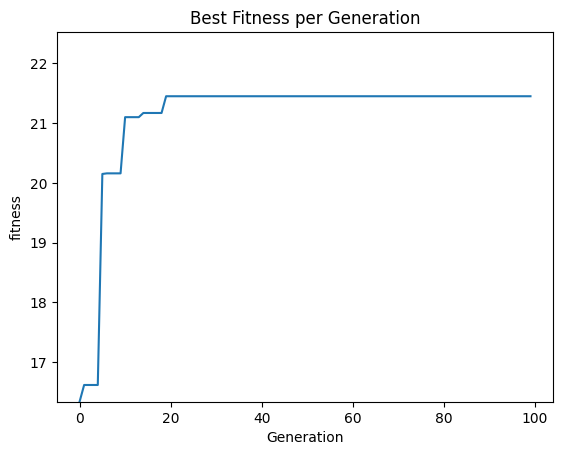

In [34]:
# Plot the data
plt.plot(fitness_track)
plt.xlabel('Generation')
plt.ylabel('fitness')
plt.title('Best Fitness per Generation')
plt.ylim(min(fitness_track), 1.05 * max(fitness_track))
plt.show()

<h2 style="color:blue">Q/A</h2>

<p>
1. <strong>The problems caused by an extremely large or small population size:</strong><br><br>
          Managing a large population in a genetic algorithm requires more computational resources, including memory and processing power. This can lead to increased execution time and costs. Small populations may have limited genetic diversity, which hinders the algorithm's ability to explore different regions of the solution space, potentially missing better solutions.
<br><br>
2. <strong>The effects of a growing population on the algorithm:</strong><br><br>
    If the population grows with each generation, although the precision of the algorithm may increase because of more diversity, the time and memory consumption will increase in each step which is a problem and may reach some limitations.The population size is kept the same because it is supposed to converge by populating it with the chromosomes closer to the answer and discarding the ones further away. By adding more in each step, we are not working in favor of the convergence.
<br><br>
3. <strong>What is the effect of crossover and mutation? Is it possible to use only one of them?</strong><br><br>
    Crossover is used to create new chromosomes from the existing chromosomes. Mutation is used to change the genes of the chromosomes. If we use only one of them, we may not be able to find the best solution. For example, if we use only crossover, we may stop at a local maximum. If we use only mutation, we may not be able to find the best solution. It is important to note that the crossover and mutation probabilities should be chosen carefully.
<br><br>
4. <strong>Approaches to solve the equation problem faster:</strong><br><br>
    The problem parameters are most effective for this. Choosing the right amount for each parameter can make the algorithm run more efficiently. for example we can change the number of chromosomes in eac population or use different and faster methods of selection. 
<br><br>
5. <strong>Despite using these methods, it is still possible that chromosomes may not change after several more stages.
    Explain the reasons for this occurrence and the problems it creates. What suggestions do you have to solve it?</strong><br><br>
    It is possible for genetic algorithm to converge to local maximum instead of global maximum, we can prevent taht by increasing the mutation rate and multi-starting the algorithm.
<br><br>
6. <strong>How to stop the algorithm if there exists no solution?</strong><br><br>
    We can limit the number of generations in order to stop the algorithm if there exists no solution.
</p>